# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

`The data represents 17 marketing campaigns between May 2008 and Nov 2010. `

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
bankdata = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
bankdata['y'].value_counts() #Imbalanced DataSet

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Check if we have any Null values
bankdata.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
import numpy as np

bankdata.select_dtypes(np.int64).nunique()

age           78
duration    1544
campaign      42
pdays         27
previous       8
dtype: int64

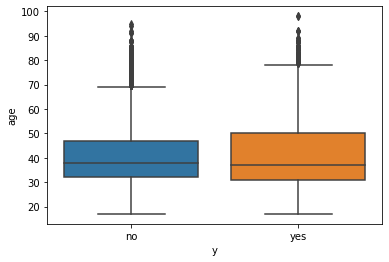

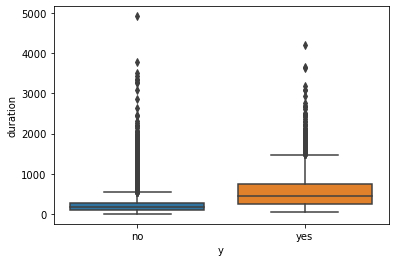

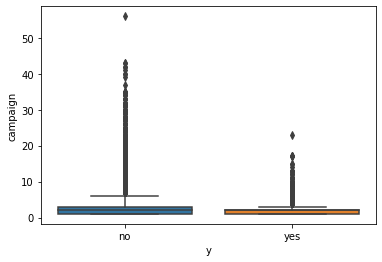

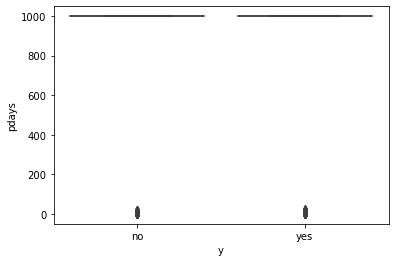

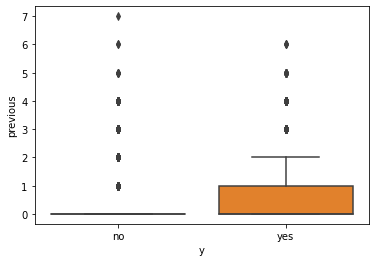

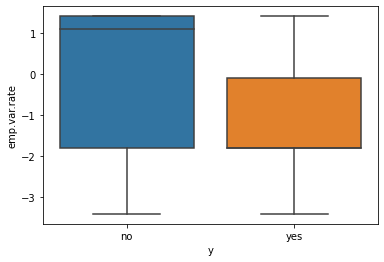

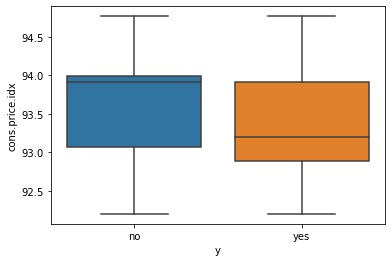

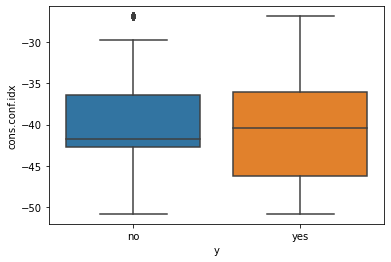

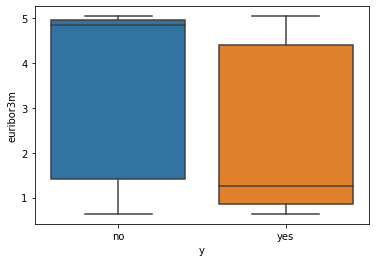

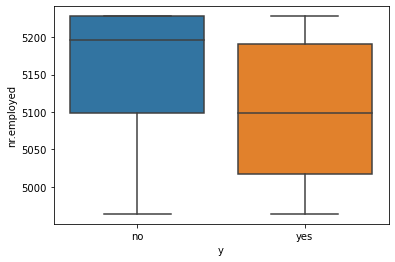

In [8]:
#Exploratory Data Analysis
#for numerical variable
import seaborn as sns
import matplotlib.pyplot as plt

num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
    sns.boxplot(x = bankdata['y'],y = i,data = bankdata)
    plt.savefig("images/boxplots_%s.png" % i )
    plt.show();

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

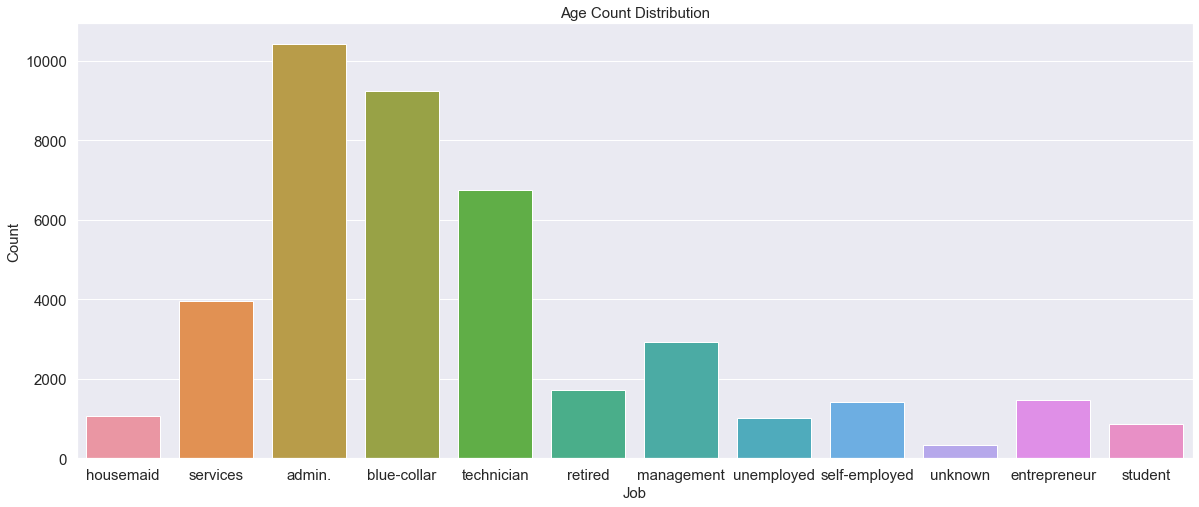

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=bankdata)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

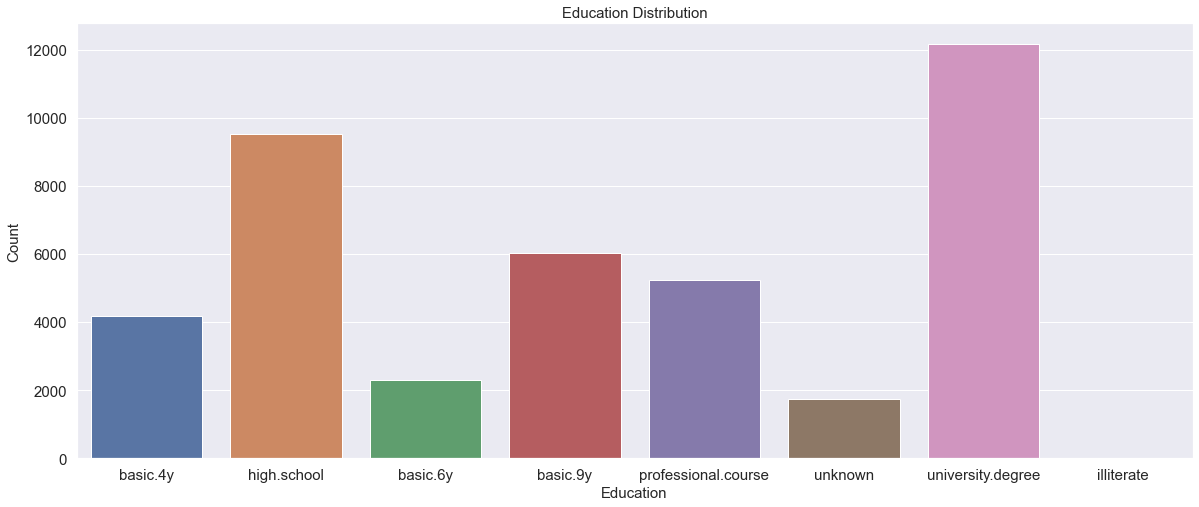

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data=bankdata)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

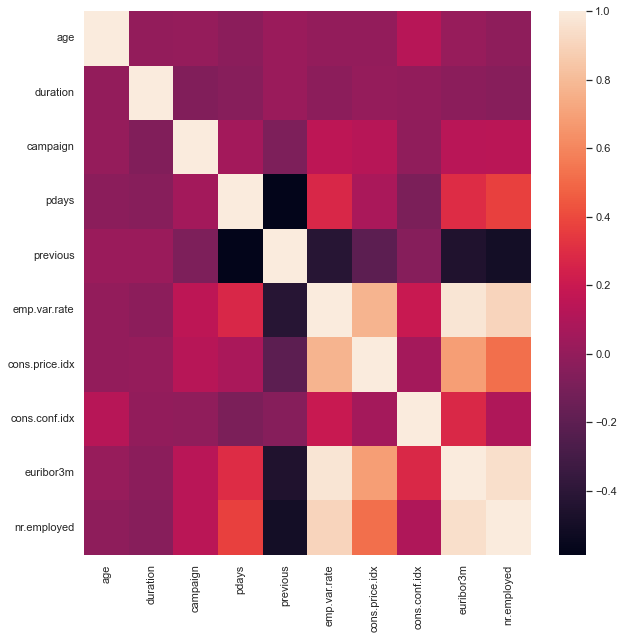

In [11]:
# Create correlation matrix
corr_matrix = bankdata.corr()
#finding the correlation among the variables

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix)
plt.show()

Here features is highly correlated like 'emp.var.rate' and 'cons.cont.idx' and many more as it can be seen from Heatmap so we need to take care of these variables

In [12]:
mapping = {"yes": 1, "no": 0}
bankdata['y'] = bankdata['y'].replace(mapping).astype(np.float64)

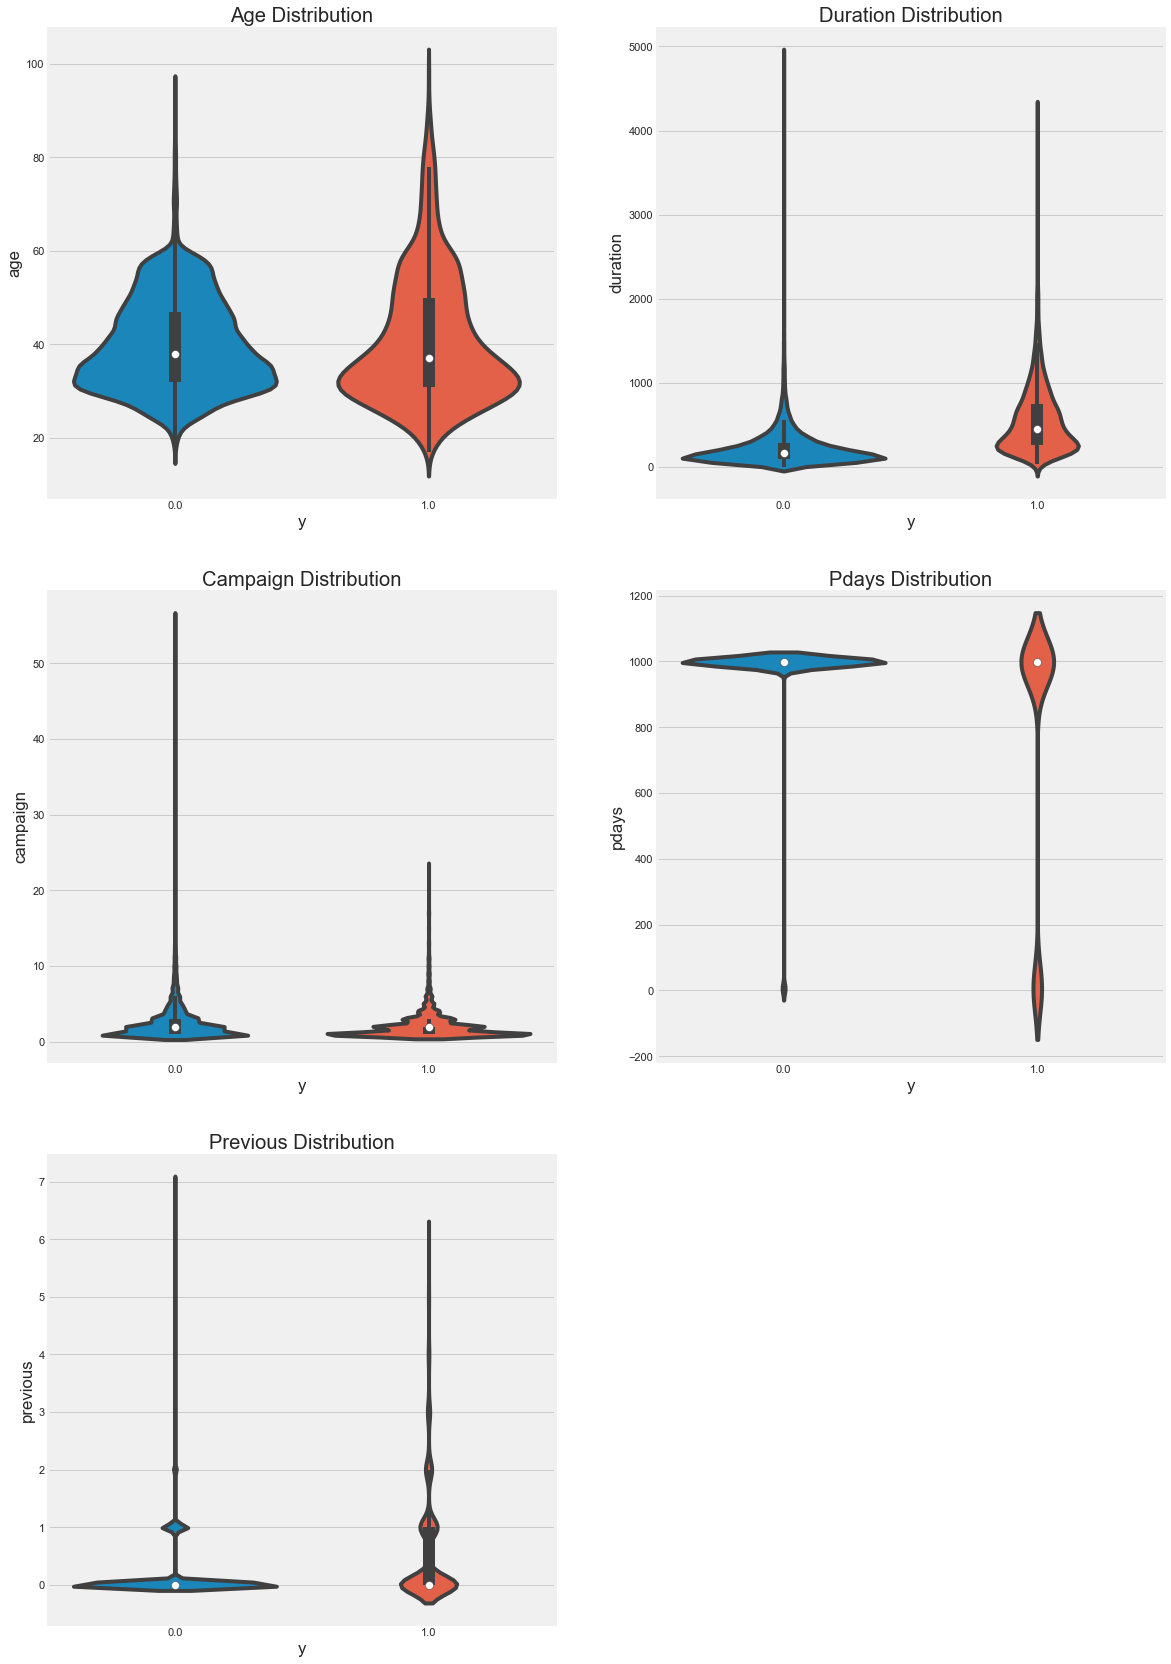

In [13]:
#violin plot to evaluate duration values and outcomes of int64

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.int64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         4640.]),
 array([0.        , 0.05882353, 0.11764706, 0.17647059, 0.23529412,
        0.29411765, 0.35294118, 0.41176471, 0.47058824, 0.52941176,
        0.58823529, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
        0.88235294, 0.94117647, 1.        ]),
 <BarContainer object of 17 artists>)

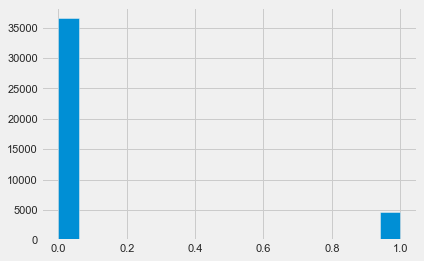

In [14]:
#analysing the label
plt.hist(bankdata['y'], bins='auto')

In [15]:
bankdata.select_dtypes(np.float64).nunique()


emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

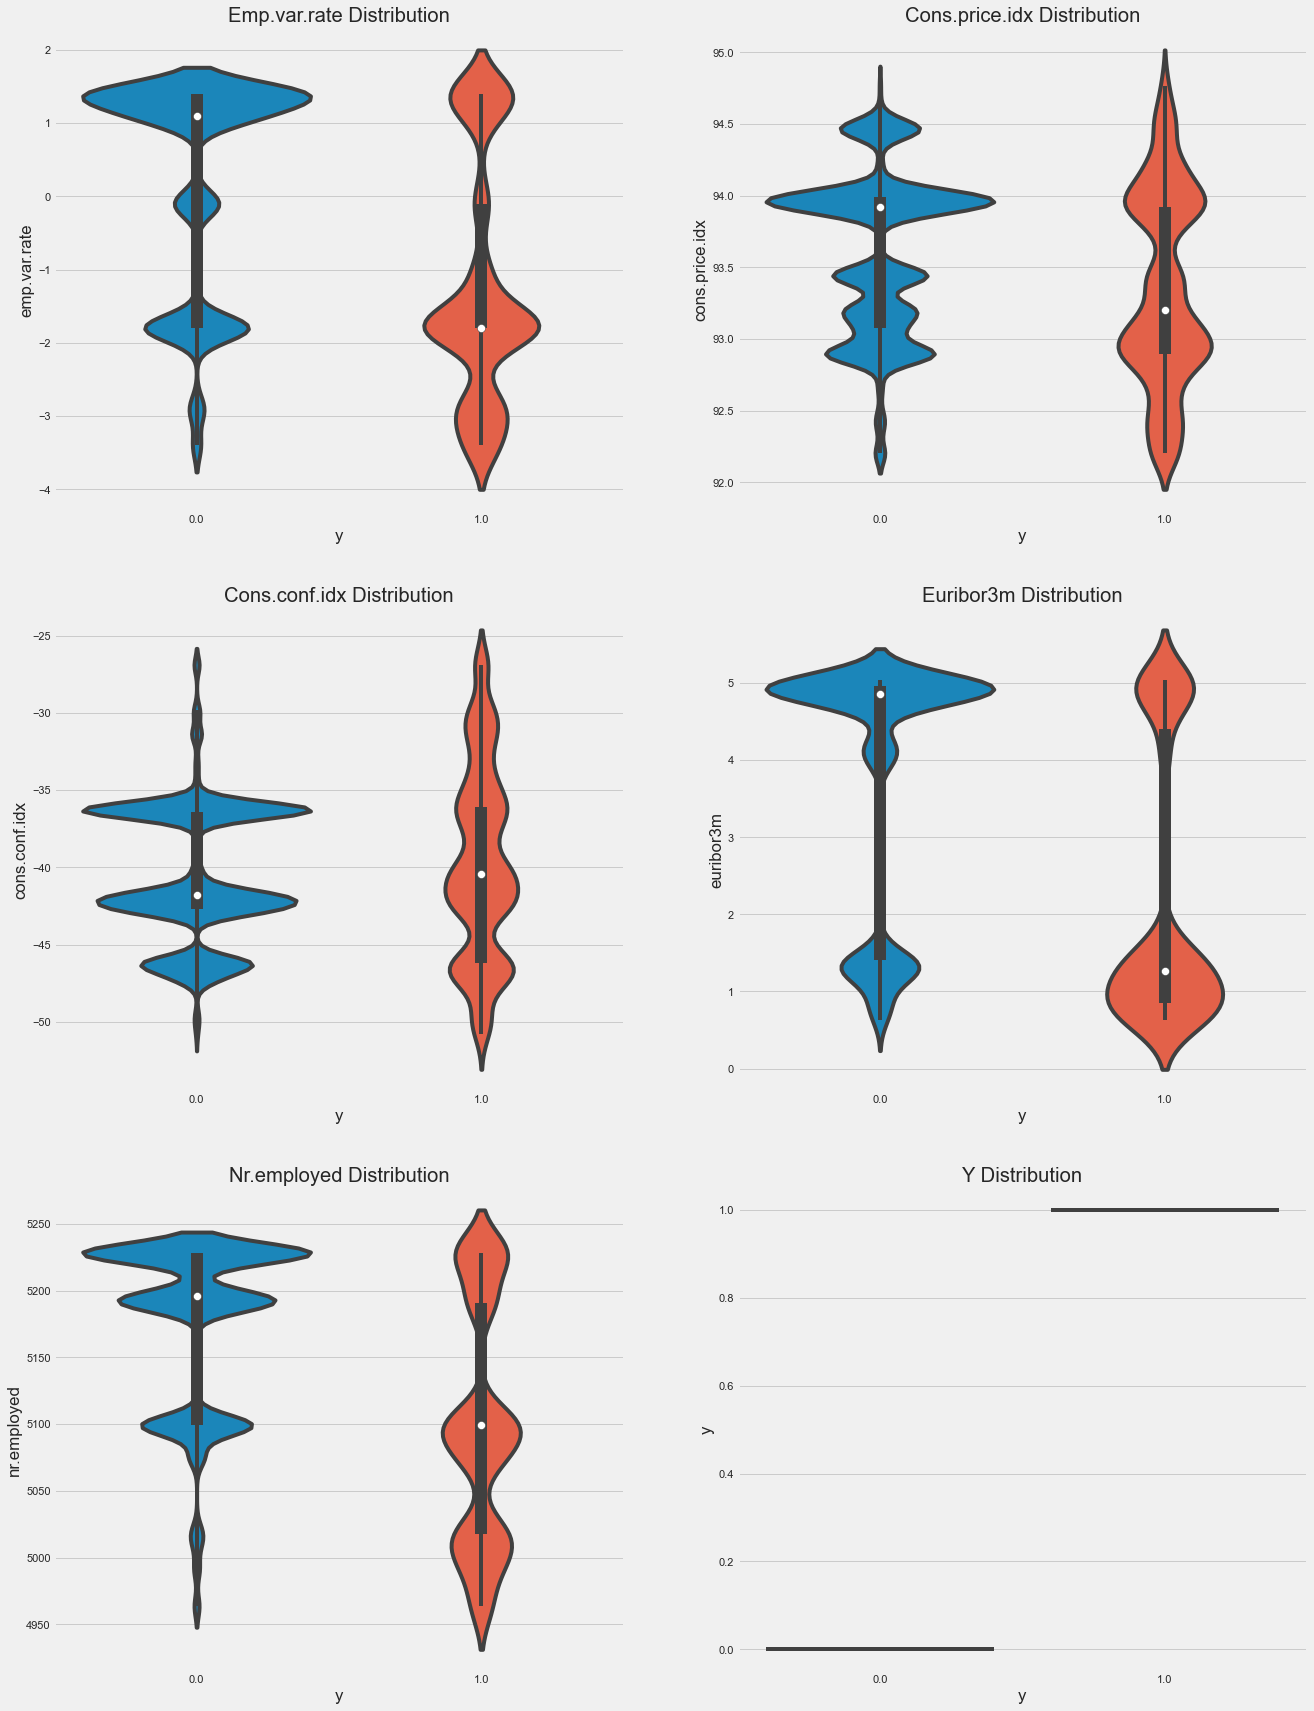

In [16]:
#violin plot to evaluate duration values and outcomes of floats

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.float64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

In [17]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [18]:
#get dummy variables for categorical data
df = bankdata[['job', 'marital', 'education', 'poutcome']]

dummiesdf = pd.get_dummies(df)

dummiesdf.shape

(41188, 27)

In [19]:
#mapping boolean data to 0/1

mapping = {"yes": 1, "no": 0, 'unknown': 2}

bankdata['default'] = bankdata['default'].replace(mapping).astype(np.float64)
bankdata['housing'] = bankdata['housing'].replace(mapping).astype(np.float64)
bankdata['loan'] = bankdata['loan'].replace(mapping).astype(np.float64)

In [20]:
mapping = {"failure": 0, "nonexistent": 1, 'success': 2}

bankdata['poutcome'] = bankdata['poutcome'].replace(mapping).astype(np.float64)

In [21]:
finaldf = pd.concat([bankdata[['poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], dummiesdf], axis=1)


In [22]:
finaldf.fillna(0)

,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41184,1.0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
41185,1.0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41186,1.0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
#split train & test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(finaldf, bankdata['y'], test_size=0.33, random_state = 32)

print(finaldf.shape)
print(bankdata['y'].shape)
print(bankdata.shape)
print(y_train)

(41188, 33)
(41188,)
(41188, 21)
28579    1.0
3241     0.0
26614    1.0
39423    1.0
4195     0.0
        ... 
19527    0.0
24828    0.0
20414    0.0
9526     0.0
10967    0.0
Name: y, Length: 27595, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
#evaluating first attempt
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [25]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])
train_set = pipeline.fit_transform(x_train)
test_set = pipeline.transform(x_test)
train_labels = y_train

features = list(finaldf.columns)
print(train_set)

[[0.5        0.33333333 0.34060795 ... 0.         1.         0.        ]
 [0.5        0.9375     0.69875292 ... 0.         1.         0.        ]
 [0.5        0.6875     0.3893219  ... 0.         1.         0.        ]
 ...
 [0.5        1.         0.48441154 ... 0.         1.         0.        ]
 [0.5        1.         0.88230709 ... 0.         1.         0.        ]
 [0.5        1.         0.88230709 ... 0.         1.         0.        ]]


In [26]:
# Lets uses Linear Regression for our basic model

model = LinearRegression().fit(train_set, train_labels)

y_pred = model.predict(test_set)

# Round off predictions to a whole number
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1


print(f'Mean absolute error for Linear Regression: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean squared error for Linear Regression: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root mean squared error  for Linear Regression: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

df_preds_linregression = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_preds_linregression

Mean absolute error for Linear Regression: 0.10
Mean squared error for Linear Regression: 0.10
Root mean squared error  for Linear Regression: 0.32


,Actual,Predicted
27469,1.0,0.0
1848,0.0,0.0
39945,0.0,0.0
38072,1.0,0.0
30016,0.0,0.0
...,...,...
18498,0.0,0.0
27374,0.0,0.0
28010,0.0,0.0
11105,0.0,0.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

def bankmarketing_success_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    %time
    algorithm.fit(training_x, training_y)
    predictions_train = algorithm.predict(training_x)  
    
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    name= type(algorithm).__name__
    
    print('Algorithm:', name)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score testing:", accuracy_score(testing_y, predictions))
    print("Accuracy Score training :", accuracy_score(training_y, predictions_train))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
     #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     #plot confusion matrix
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels for ' + str(name) +  '\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    

CPU times: user 18 µs, sys: 9 µs, total: 27 µs
Wall time: 6.91 µs
Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     12034
         1.0       0.65      0.16      0.26      1559

    accuracy                           0.89     13593
   macro avg       0.78      0.58      0.60     13593
weighted avg       0.87      0.89      0.87     13593

Accuracy Score testing: 0.8941366880011771
Accuracy Score training : 0.8993295886936039
Area under curve: 0.5767324257558469 



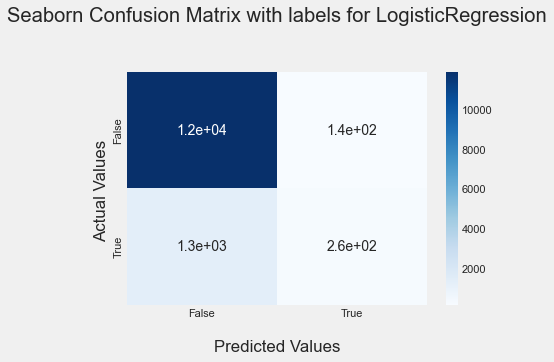

In [28]:
from sklearn.linear_model import LogisticRegression

#Baseline model        
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

bankmarketing_success_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

In [29]:
logit_train_time='6.91 µs'
logit_train_acc = '89.94%'
logit_test_acc = '89.35%'

In [30]:
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

model = LogisticRegression(random_state=42)


## 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10,scoring='accuracy')



print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.9001 with std = 0.0019


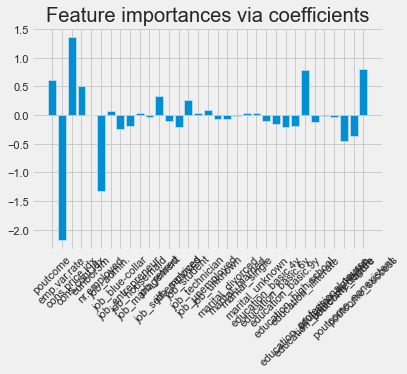

In [31]:
model.fit(train_set, train_labels)
importance = model.coef_[0]

Logpred = model.predict(x_test)

#importance is a list so you can plot it. 
feature_importances = pd.Series(importance)
feature_names = np.array(finaldf.columns)


plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (18,8)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy Score of Logistic Regression model is 89.35%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94     12034
         1.0       0.51      0.29      0.37      1559

    accuracy                           0.89     13593
   macro avg       0.71      0.63      0.65     13593
weighted avg       0.87      0.89      0.87     13593

Accuracy Score testing: 0.8861914220554697
Accuracy Score training : 0.9128465301685088
Area under curve: 0.62528733800309 



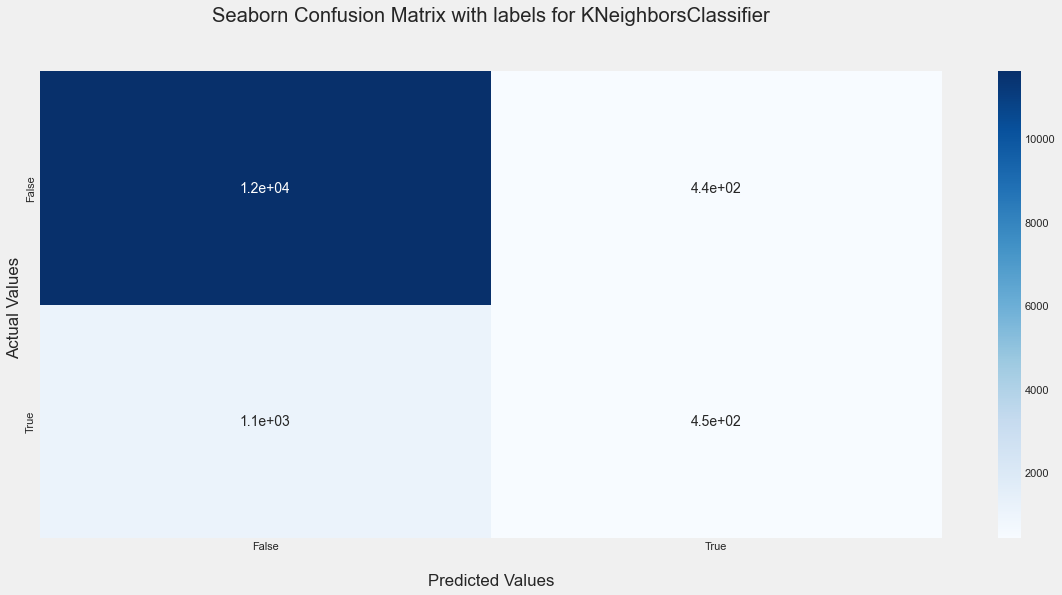

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
bankmarketing_success_prediction(knn, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

In [33]:
knn_train_time='5.72 µs'
knn_train_acc='91.20%'
knn_test_acc='88.58%'


In [34]:
def treeplot(classifier, cols, classnames):
    #plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12034
         1.0       0.61      0.23      0.33      1559

    accuracy                           0.90     13593
   macro avg       0.76      0.60      0.64     13593
weighted avg       0.87      0.90      0.87     13593

Accuracy Score testing: 0.8950194953284779
Accuracy Score training : 0.9094763544120311
Area under curve: 0.6040312816913976 



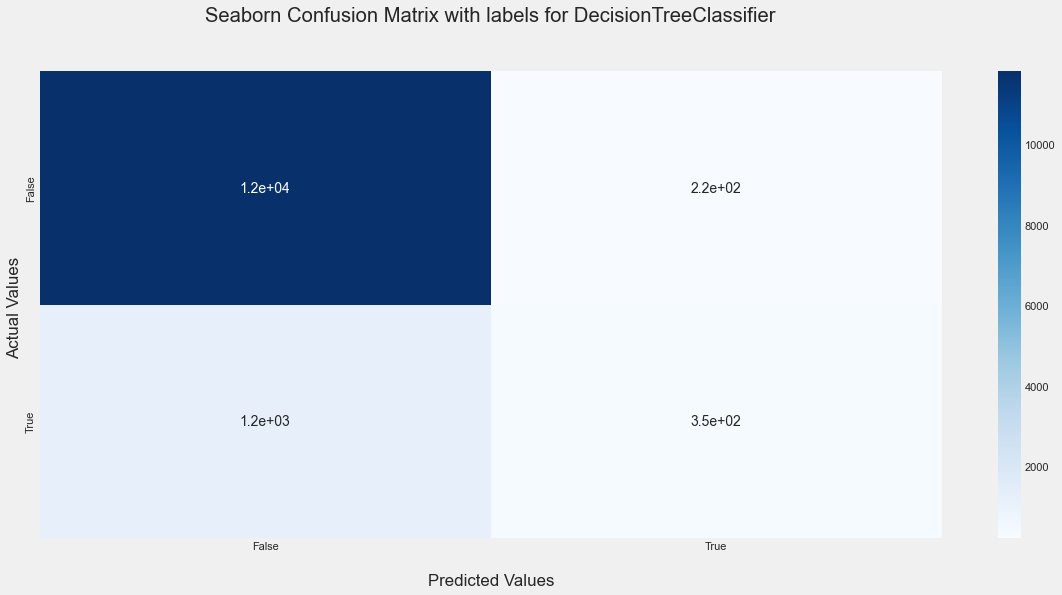

In [35]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz
from sklearn import tree
#from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

bankmarketing_success_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

#plot decision tree
#treeplot(decision_tree, cols, ["Not churn", "Churn"])

In [36]:
dtree_train_time='5.96 µs'
dtree_train_acc='90.94%'
dtree_test_acc='89.49%'


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12034
         1.0       0.61      0.20      0.31      1559

    accuracy                           0.89     13593
   macro avg       0.76      0.59      0.62     13593
weighted avg       0.87      0.89      0.87     13593

Accuracy Score testing: 0.8936952843375267
Accuracy Score training : 0.8972639971009241
Area under curve: 0.593791638891859 



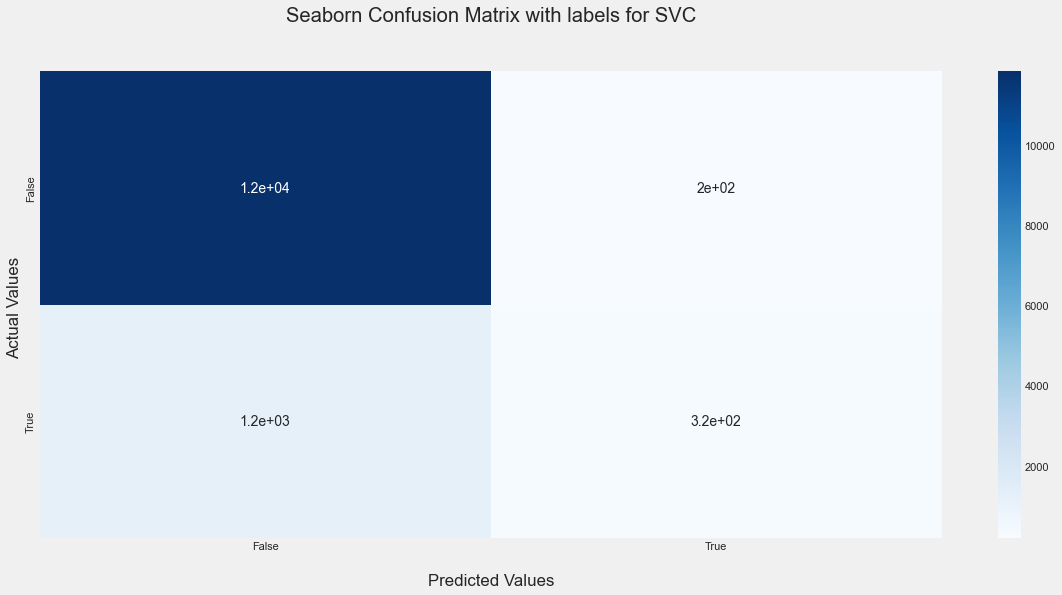

In [37]:
from sklearn.svm import SVC

#Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

bankmarketing_success_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

In [38]:
svm_train_time='5.01 µs'
svm_train_acc='89.42%'
svm_test_acc='89.27%'

In [39]:
models_perf = pd.DataFrame({
                'Models': ['k-nearest neighbors', 'logistic regression',
                           'decision trees', 'support vector machines'],
                'Train Time':  [knn_train_time, logit_train_time, dtree_train_time, svm_train_time],
                'Train Accuracy':  [knn_train_acc, logit_train_acc, dtree_train_acc, svm_train_acc],
                'Test Accuracy':   [knn_test_acc, logit_test_acc, dtree_test_acc, svm_test_acc]
                      })

models_perf.set_index('Models')

,Train Time,Train Accuracy,Test Accuracy
Models,,,
k-nearest neighbors,5.72 µs,91.20%,88.58%
logistic regression,6.91 µs,89.94%,89.35%
decision trees,5.96 µs,90.94%,89.49%
support vector machines,5.01 µs,89.42%,89.27%


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

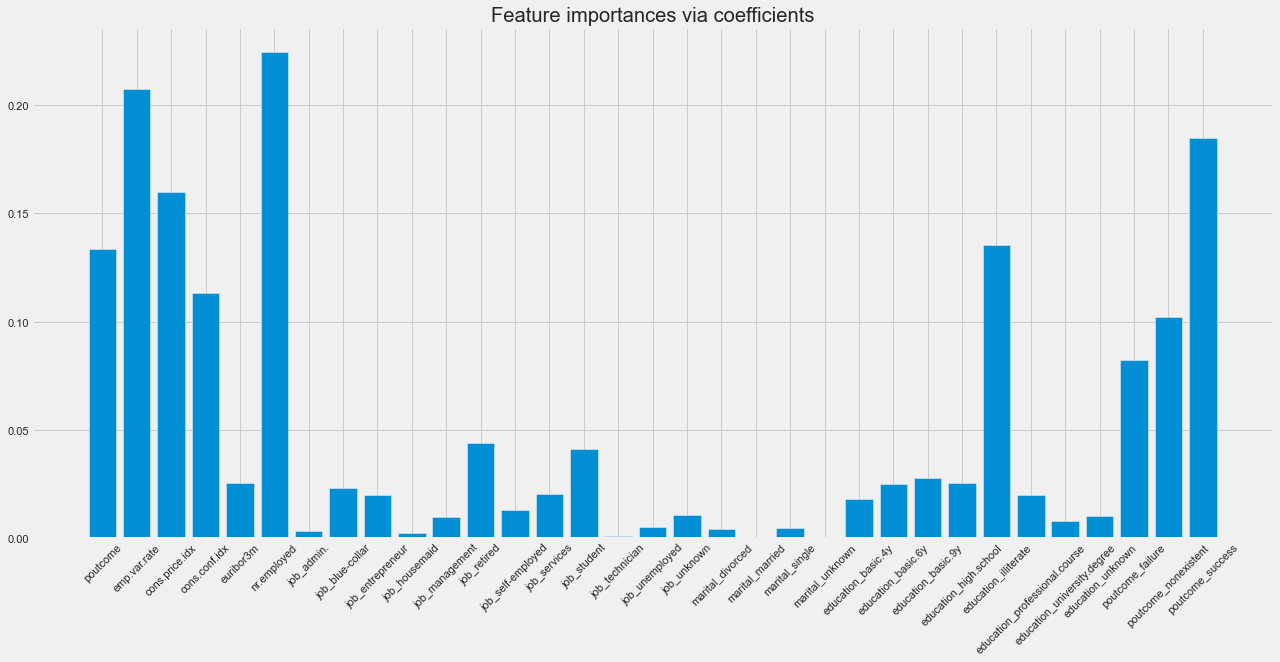

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(train_set, train_labels)
importance = np.abs(ridge.coef_)
feature_names = np.array(finaldf.columns)


plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.rcParams["figure.figsize"] = (18,8)
plt.tight_layout()
plt.xticks(rotation = 45)

plt.show()

In [41]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore')


# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring='accuracy', n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [43]:
# Filter out warnings from models

model_results = cv_model(train_set, train_labels, LinearSVC(),'LSVC', model_results)




10 Fold CV Score: 0.89987 with std: 0.00173


In [44]:
from sklearn.model_selection import cross_val_score


In [45]:
knnmodel = KNeighborsClassifier() 
knnmodel.fit(x_train,y_train)
knnpred = knnmodel.predict(x_test)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knnmodel, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11599   435]
 [ 1112   447]]
89.0


In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train)
logpred = logmodel.predict(x_test)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11905   129]
 [ 1278   281]]
90.0


In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(x_train, y_train)
dtreepred = dtree.predict(x_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11517   517]
 [ 1122   437]]
88.0


In [48]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(x_train, y_train)
svcpred = svc.predict(x_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12034     0]
 [ 1559     0]]
89.0


In [49]:
models = pd.DataFrame({
               'Models': ['k-nearest neighbors', 'logistic regression',
                           'decision trees', 'support vector machines'],
                'Score':  [KNNCV, LOGCV, DTREECV, SVCCV]})

models.set_index('Models')

,Score
Models,
k-nearest neighbors,0.891248
logistic regression,0.899764
decision trees,0.883384
support vector machines,0.888349


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
core_count=2
X_train=x_train
Y_train=y_train

# # Gradient Boosting
# We used Gridsearch and cross validaiton to tune the paramaters to show how this could be done. This can further be improved though.

param_test1 = {'n_estimators':range(20,200,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=core_count,cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_, gsearch1.best_score_


#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(5,20,2), 'min_samples_split':range(100,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_, gsearch1.best_score_


#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':range(500,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.best_params_, gsearch3.best_score_



param_test4 = {'max_features':range(2,8,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_, gsearch3.best_score_



param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(X_train,Y_train)
gsearch5.best_params_, gsearch3.best_score_



({'subsample': 0.85}, 0.7931933014213556)

In [51]:
models_bs = pd.DataFrame({
               'GridSearchCV Params': ['Estimators range 10-200','Max depth 2-20', 'Min sample 200-2100', 'Max Features 2-8','Subsample 0.6-0.9'],
                'Best Params':  [gsearch1.best_params_, gsearch2.best_params_,gsearch3.best_params_,gsearch4.best_params_,gsearch5.best_params_ ],
                'Best Score':  [gsearch1.best_score_, gsearch2.best_score_,gsearch3.best_score_,gsearch4.best_score_,gsearch5.best_score_ ],
                       })

models_bs.set_index('GridSearchCV Params')

,Best Params,Best Score
GridSearchCV Params,,
Estimators range 10-200,{'n_estimators': 30},0.792954
Max depth 2-20,"{'max_depth': 7, 'min_samples_split': 300}",0.793099
Min sample 200-2100,"{'min_samples_leaf': 30, 'min_samples_split': ...",0.793193
Max Features 2-8,{'max_features': 6},0.793093
Subsample 0.6-0.9,{'subsample': 0.85},0.794472
